In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio

In [2]:
import yaml

with open("/kaggle/input/psl-10-mo1/Match 1.yaml", "r") as f:
    match_data = yaml.safe_load(f)
#print(match_data)

## Explore Match Info


In [3]:
# General info
print(match_data["info"]["teams"])   # Teams playing
print(match_data["info"]["venue"])   # Venue

['Lahore Qalandars', 'Islamabad United']
Rawalpindi Cricket Stadium


## Get Ball-by-Ball Data

In [4]:
innings = match_data["innings"]

# Example: First innings deliveries
first_innings = innings[0]["1st innings"]["deliveries"]

# Show first 5 deliveries
for ball in first_innings[:5]:
    print(ball)


{0.1: {'non_striker': 'Muhammad Naeem', 'bowler': 'Naseem Shah', 'runs': {'extras': 0, 'total': 0, 'batsman': 0}, 'batsman': 'Fakhar Zaman'}}
{0.2: {'non_striker': 'Muhammad Naeem', 'bowler': 'Naseem Shah', 'runs': {'extras': 0, 'total': 0, 'batsman': 0}, 'batsman': 'Fakhar Zaman'}}
{0.3: {'non_striker': 'Muhammad Naeem', 'bowler': 'Naseem Shah', 'runs': {'extras': 0, 'total': 1, 'batsman': 1}, 'batsman': 'Fakhar Zaman'}}
{0.4: {'non_striker': 'Fakhar Zaman', 'bowler': 'Naseem Shah', 'runs': {'extras': 0, 'total': 0, 'batsman': 0}, 'batsman': 'Muhammad Naeem'}}
{0.5: {'non_striker': 'Fakhar Zaman', 'bowler': 'Naseem Shah', 'runs': {'extras': 0, 'total': 0, 'batsman': 0}, 'batsman': 'Muhammad Naeem'}}


## Flatten Into Pandas DataFrame

In [5]:
import pandas as pd

balls = []
for delivery in first_innings:
    for ball, details in delivery.items():
        balls.append({
            "ball": ball,
            "batsman": details["batsman"],
            "bowler": details["bowler"],
            "runs": details["runs"]["batsman"],
            "extras": details["runs"]["extras"],
            "total_runs": details["runs"]["total"]
        })

df = pd.DataFrame(balls)
print(df.head(10))


   ball         batsman       bowler  runs  extras  total_runs
0   0.1    Fakhar Zaman  Naseem Shah     0       0           0
1   0.2    Fakhar Zaman  Naseem Shah     0       0           0
2   0.3    Fakhar Zaman  Naseem Shah     1       0           1
3   0.4  Muhammad Naeem  Naseem Shah     0       0           0
4   0.5  Muhammad Naeem  Naseem Shah     0       0           0
5   0.6  Muhammad Naeem  Naseem Shah     0       0           0
6   1.1    Fakhar Zaman  RP Meredith     0       1           1
7   1.2  Muhammad Naeem  RP Meredith     1       0           1
8   1.3    Fakhar Zaman  RP Meredith     0       0           0
9   1.4    Fakhar Zaman  RP Meredith     0       1           1


## Extract First Innings Data

In [6]:


# First innings deliveries
first_innings = match_data["innings"][0]["1st innings"]["deliveries"]

balls = []
for delivery in first_innings:
    for ball, details in delivery.items():
        row = {
            "ball": ball,
            "batsman": details["batsman"],
            "bowler": details["bowler"],
            "runs": details["runs"]["batsman"],
            "extras": details["runs"]["extras"],
            "total_runs": details["runs"]["total"],
            "wicket": details.get("wicket", None)
        }
        balls.append(row)

df = pd.DataFrame(balls)
first_innings_df = df
print(first_innings_df.head(10))


   ball         batsman       bowler  runs  extras  total_runs wicket
0   0.1    Fakhar Zaman  Naseem Shah     0       0           0   None
1   0.2    Fakhar Zaman  Naseem Shah     0       0           0   None
2   0.3    Fakhar Zaman  Naseem Shah     1       0           1   None
3   0.4  Muhammad Naeem  Naseem Shah     0       0           0   None
4   0.5  Muhammad Naeem  Naseem Shah     0       0           0   None
5   0.6  Muhammad Naeem  Naseem Shah     0       0           0   None
6   1.1    Fakhar Zaman  RP Meredith     0       1           1   None
7   1.2  Muhammad Naeem  RP Meredith     1       0           1   None
8   1.3    Fakhar Zaman  RP Meredith     0       0           0   None
9   1.4    Fakhar Zaman  RP Meredith     0       1           1   None


## Batting Summary

In [7]:


# Batting summary (already created)
batting_summary = df.groupby("batsman")["runs"].sum().reset_index()

# Beautiful & unique chart
plt_bat = px.bar(
    batting_summary,
    x="batsman",
    y="runs",
    text="runs",
    title="🏏 1st Innings Batting Performance",
    color="runs",  # gradient color by runs
    color_continuous_scale=px.colors.sequential.Viridis
)

# Style tweaks
plt_bat.update_traces(
    textposition="outside",
    marker=dict(line=dict(width=1, color="black")),
    hovertemplate="<b>%{x}</b><br>Runs: %{y}<extra></extra>"
)

plt_bat.update_layout(
    plot_bgcolor="white",
    xaxis=dict(title="Batsman", showgrid=False),
    yaxis=dict(title="Runs Scored", showgrid=True, gridcolor="lightgray"),
    font=dict(family="Arial Black", size=14),
    title_font=dict(size=20, color="darkblue"),
    bargap=0.4
)

plt_bat.show()

In [8]:

# Line graph for batting performance
fig_bat_line = px.line(
    batting_summary,
    x="batsman",
    y="runs",
    markers=True,  # adds dots on each point
    title="📈 1st Innings Batting Performance (Line Graph)"
)

# Style improvements
fig_bat_line.update_traces(
    line=dict(color="darkblue", width=3),
    marker=dict(size=10, color="orange", line=dict(width=2, color="black")),
    hovertemplate="<b>Batsman:</b> %{x}<br>Runs: %{y}<extra></extra>"
)

fig_bat_line.update_layout(
    plot_bgcolor="white",
    xaxis=dict(title="Batsman", showgrid=False),
    yaxis=dict(title="Runs Scored", showgrid=True, gridcolor="lightgray"),
    font=dict(family="Verdana", size=13),
    title_font=dict(size=20, color="darkblue")
)

fig_bat_line.show()

## Bowling Summary

In [9]:

# Bowling summary
wickets = df[df["wicket"].notnull()].groupby("bowler").size().reset_index(name="wickets")
runs_conceded = df.groupby("bowler")["total_runs"].sum().reset_index()

bowling_summary = runs_conceded.merge(wickets, on="bowler", how="left").fillna(0)

# Beautiful bowling chart
fig_bowl = px.bar(
    bowling_summary,
    x="bowler",
    y="wickets",
    text="wickets",
    title="🎯 Bowling Performance – 1st Innings",
    color="wickets",
    color_continuous_scale=px.colors.sequential.Magma
)

# Style improvements
fig_bowl.update_traces(
    textposition="outside",
    marker=dict(line=dict(width=1, color="black")),
    hovertemplate="<b>%{x}</b><br>Wickets: %{y}<br>Runs Conceded: %{customdata}<extra></extra>",
    customdata=bowling_summary[["total_runs"]]
)

fig_bowl.update_layout(
    plot_bgcolor="white",
    xaxis=dict(title="Bowler", showgrid=False),
    yaxis=dict(title="Wickets Taken", showgrid=True, gridcolor="lightgray"),
    font=dict(family="Arial Black", size=14),
    title_font=dict(size=20, color="darkred"),
    bargap=0.35
)

fig_bowl.show()

In [10]:
# Line graph for bowling performance
fig_bowl_line = px.line(
    bowling_summary,
    x="bowler",
    y="wickets",
    markers=True,  # dots on each bowler
    title="📉 Bowling Performance – 1st Innings"
)

# Style improvements
fig_bowl_line.update_traces(
    line=dict(color="darkred", width=3),
    marker=dict(size=10, color="gold", line=dict(width=2, color="black")),
    hovertemplate="<b>Bowler:</b> %{x}<br>Wickets: %{y}<br>Runs Conceded: %{customdata}<extra></extra>",
    customdata=bowling_summary[["total_runs"]]
)

fig_bowl_line.update_layout(
    plot_bgcolor="white",
    xaxis=dict(title="Bowler", showgrid=False),
    yaxis=dict(title="Wickets Taken", showgrid=True, gridcolor="lightgray"),
    font=dict(family="Verdana", size=13),
    title_font=dict(size=20, color="darkred")
)

fig_bowl_line.show()

## Catches

In [11]:
# Extract fielders for dismissals (if available)
catch_data = []
for _, row in first_innings_df[first_innings_df["wicket"].notnull()].iterrows():
    dismissal = row["wicket"]
    if dismissal and dismissal["kind"] == "caught":
        catch_data.append(dismissal["fielders"][0])

catch_summary = pd.Series(catch_data).value_counts().reset_index()
catch_summary.columns = ["fielder","catches"]

In [12]:

fig_catch = px.bar(
    catch_summary,
    x="fielder",
    y="catches",
    text="catches",
    title="🧤 Fielding Impact – Catches Taken (1st Innings)",
    color="catches",
    color_continuous_scale=px.colors.sequential.Plasma
)

# Style improvements
fig_catch.update_traces(
    textposition="outside",
    marker=dict(line=dict(width=1, color="black")),
    hovertemplate="<b>Fielder:</b> %{x}<br>Catches: %{y}<extra></extra>"
)

fig_catch.update_layout(
    plot_bgcolor="white",
    xaxis=dict(title="Fielder", showgrid=False),
    yaxis=dict(title="Catches", showgrid=True, gridcolor="lightgray"),
    font=dict(family="Verdana", size=13),
    title_font=dict(size=20, color="darkgreen"),
    bargap=0.4
)

fig_catch.show()


## Total_innings1 Score

In [13]:
# First innings total (Team batting first)
total_innings1 = df["total_runs"].sum()

# Target for second innings
target = total_innings1 + 1

# Second innings total (Team chasing)
#total_innings2 = df2["total_runs"].sum()

print(f"First Innings Score: {total_innings1}")
print(f"Target for 2nd Innings: {target}")

First Innings Score: 139
Target for 2nd Innings: 140


# Extract Second Innings Data

In [14]:
# Access 2nd innings deliveries
second_innings = match_data["innings"][1]["2nd innings"]["deliveries"]

balls_2 = []
for delivery in second_innings:
    for ball, details in delivery.items():
        row = {
            "ball": ball,
            "batsman": details["batsman"],
            "bowler": details["bowler"],
            "runs": details["runs"]["batsman"],
            "extras": details["runs"]["extras"],
            "total_runs": details["runs"]["total"],
            "wicket": details.get("wicket", None)
        }
        balls_2.append(row)

df2 = pd.DataFrame(balls_2)

# Preview 2nd innings data
print(df2.head())

   ball           batsman               bowler  runs  extras  total_runs  \
0   0.1  Sahibzada Farhan  Shaheen Shah Afridi     0       0           0   
1   0.2  Sahibzada Farhan  Shaheen Shah Afridi     0       0           0   
2   0.3  Sahibzada Farhan  Shaheen Shah Afridi     0       1           1   
3   0.4  Sahibzada Farhan  Shaheen Shah Afridi     0       0           0   
4   0.5  Sahibzada Farhan  Shaheen Shah Afridi     1       0           1   

  wicket  
0   None  
1   None  
2   None  
3   None  
4   None  


## 2_Batting Summary

In [15]:
# Batting summary (2nd innings)
batting_summary2 = df2.groupby("batsman")["runs"].sum().reset_index()

# Beautiful batting chart
fig_bat2 = px.bar(
    batting_summary2,
    x="batsman",
    y="runs",
    text="runs",
    title="🏏 2nd Innings Batting Performance",
    color="runs",
    color_continuous_scale=px.colors.sequential.Cividis
)

# Styling improvements
fig_bat2.update_traces(
    textposition="outside",
    marker=dict(line=dict(width=1, color="black")),
    hovertemplate="<b>Batsman:</b> %{x}<br>Runs: %{y}<extra></extra>"
)

fig_bat2.update_layout(
    plot_bgcolor="white",
    xaxis=dict(title="Batsman", showgrid=False),
    yaxis=dict(title="Runs Scored", showgrid=True, gridcolor="lightgray"),
    font=dict(family="Verdana", size=14),
    title_font=dict(size=22, color="darkblue"),
    bargap=0.35
)

fig_bat2.show()

In [16]:


# Line graph for 2nd innings batting performance
fig_bat2_line = px.line(
    batting_summary2,
    x="batsman",
    y="runs",
    markers=True,
    title="📈 2nd Innings Batting Performance"
)

# Style tweaks
fig_bat2_line.update_traces(
    line=dict(color="darkblue", width=3),
    marker=dict(size=10, color="orange", line=dict(width=2, color="black")),
    hovertemplate="<b>Batsman:</b> %{x}<br>Runs: %{y}<extra></extra>"
)

fig_bat2_line.update_layout(
    plot_bgcolor="white",
    xaxis=dict(title="Batsman", showgrid=False),
    yaxis=dict(title="Runs Scored", showgrid=True, gridcolor="lightgray"),
    font=dict(family="Verdana", size=14),
    title_font=dict(size=22, color="darkblue")
)

fig_bat2_line.show()

## Bowling Summary

In [17]:
# Bowling summary (2nd innings)
wickets2 = df2[df2["wicket"].notnull()].groupby("bowler").size().reset_index(name="wickets")
runs_conceded2 = df2.groupby("bowler")["total_runs"].sum().reset_index()

bowling_summary2 = runs_conceded2.merge(wickets2, on="bowler", how="left").fillna(0)

# Beautiful bowling chart
fig_bowl2 = px.bar(
    bowling_summary2,
    x="bowler",
    y="wickets",
    text="wickets",
    title="🔥 Bowling Performance – 2nd Innings",
    color="wickets",
    color_continuous_scale=px.colors.sequential.Reds
)

# Styling improvements
fig_bowl2.update_traces(
    textposition="outside",
    marker=dict(line=dict(width=1, color="black")),
    hovertemplate="<b>Bowler:</b> %{x}<br>Wickets: %{y}<br>Runs Conceded: %{customdata}<extra></extra>",
    customdata=bowling_summary2[["total_runs"]]
)

fig_bowl2.update_layout(
    plot_bgcolor="white",
    xaxis=dict(title="Bowler", showgrid=False),
    yaxis=dict(title="Wickets Taken", showgrid=True, gridcolor="lightgray"),
    font=dict(family="Verdana", size=13),
    title_font=dict(size=22, color="darkred"),
    bargap=0.35
)

fig_bowl2.show()

## Catches Summary

In [18]:
catch_data2 = []
for _, row in df2[df2["wicket"].notnull()].iterrows():
    dismissal = row["wicket"]
    if dismissal and dismissal["kind"] == "caught":
        catch_data2.append(dismissal["fielders"][0])

if catch_data2:  # only plot if catches exist
    catch_summary2 = pd.Series(catch_data2).value_counts().reset_index()
    catch_summary2.columns = ["fielder","catches"]

In [19]:
if catch_data2:  # only plot if catches exist
    catch_summary2 = pd.Series(catch_data2).value_counts().reset_index()
    catch_summary2.columns = ["fielder","catches"]

    # Beautiful fielding chart
    fig_catch2 = px.bar(
        catch_summary2,
        x="fielder",
        y="catches",
        text="catches",
        title="🧤 Fielding Impact – Catches Taken (2nd Innings)",
        color="catches",
        color_continuous_scale=px.colors.sequential.Blues
    )

    # Styling upgrades
    fig_catch2.update_traces(
        textposition="outside",
        marker=dict(line=dict(width=1, color="black")),
        hovertemplate="<b>Fielder:</b> %{x}<br>Catches: %{y}<extra></extra>"
    )

    fig_catch2.update_layout(
        plot_bgcolor="white",
        xaxis=dict(title="Fielder", showgrid=False),
        yaxis=dict(title="Catches Taken", showgrid=True, gridcolor="lightgray"),
        font=dict(family="Verdana", size=13),
        title_font=dict(size=22, color="darkblue"),
        bargap=0.4
    )

    fig_catch2.show()


## Total_innings2 Score

In [20]:
# First innings total (Team batting first)
total_innings1 = df["total_runs"].sum()



# Second innings total (Team chasing)
total_innings2 = df2["total_runs"].sum()


print(f"Target for 2nd Innings: {target}")
print(f"Second Innings Score: {total_innings2}")

Target for 2nd Innings: 140
Second Innings Score: 143


## Extract Winner

In [21]:
# Get match outcome
outcome = match_data["info"]["outcome"]

if "winner" in outcome:
    winner = outcome["winner"]
    if "by" in outcome:
        win_type = list(outcome["by"].keys())[0]   # runs / wickets
        margin = outcome["by"][win_type]
        print(f"🏆 {winner} won the match by {margin} {win_type}")
    else:
        print(f"🏆 {winner} won the match")
else:
    print("The match ended in a tie or no result")

🏆 Islamabad United won the match by 8 wickets


## Bar Chart of Match Outcome

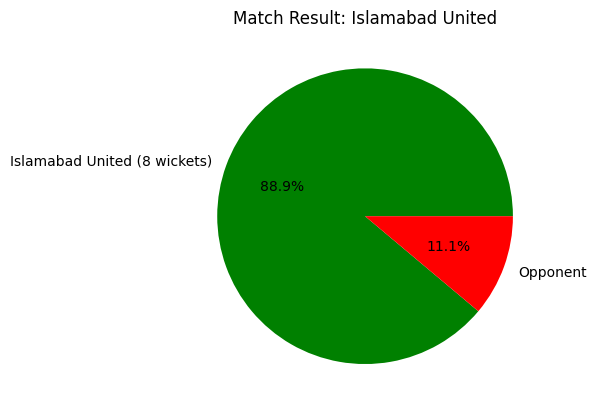

In [22]:
if "winner" in outcome and "by" in outcome:
    winner = outcome["winner"]
    win_type = list(outcome["by"].keys())[0]
    margin = outcome["by"][win_type]

    plt.pie([margin, 1], labels=[f"{winner} ({margin} {win_type})", "Opponent"],
            autopct='%1.1f%%', colors=["green", "red"])
    plt.title(f"Match Result: {winner}")
    plt.show()


In [23]:
# First innings total (Team batting first)
total_innings1 = df["total_runs"].sum()

# Target for second innings
target = total_innings1 + 1

# Second innings total (Team chasing)
total_innings2 = df2["total_runs"].sum()

print(f"First Innings Score: {total_innings1}")
print(f"Target for 2nd Innings: {target}")

print(f"Second Innings Score: {total_innings2}")

First Innings Score: 139
Target for 2nd Innings: 140
Second Innings Score: 143


 ## 🏏 Match Summary – Lahore Qalandars vs Islamabad United

Teams: Lahore Qalandars 🆚 Islamabad United

Format: T20 (PSL)

Venue: (from YAML: match_data["info"]["venue"])

📊 First Innings (Lahore Qalandars)

Total Runs: 139

Top Scorer: Player A – Abdullah shafique(66)

Best Bowler (opponent): Player B – Z wickets Asif afridi 

📊 Second Innings (Islamabad United)

Total Runs: 143*

Top Scorer: Player C – C Munro 

Best Bowler (opponent): Player D – Jo Holder(4w)

🏆 Match Result

**Winner:**`  Islamabad United`